# Лабораторная работа 1

### Выполнила Кривоконева Екатерина, группа 6233-010402D


Задание:

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

Набор данных: CIFAR-10


## 1. Классификация данных методом k ближайших соседей (kNN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

In [2]:
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

In [3]:
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



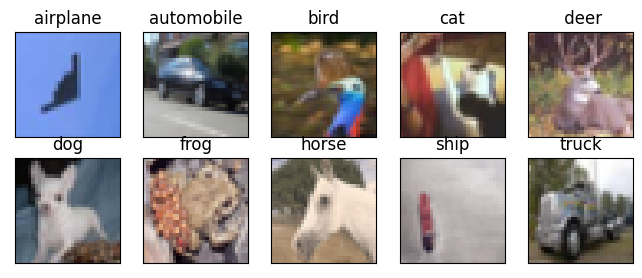

In [4]:
class_names = ['airplane', 'automobile', 'bird','cat',' deer', 'dog',
               'frog', 'horse', 'ship', 'truck']

num_classes = len(class_names)

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im.astype(np.uint8))
plt.show()

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив.

In [5]:
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке.

1.5 Выполните классификацию на тестовой выборке

In [ ]:
from scripts.classifiers import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

In [8]:
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

(500, 5000)


1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


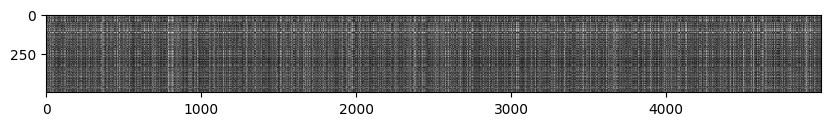

In [9]:
plt.imshow(dists, interpolation='none')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [10]:
y_test_pred = classifier.predict_labels(dists)

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

In [11]:
k_choices = range(1, 25)
k_accuracies = {}

for k in k_choices:
    y_test_pred = classifier.predict_labels(dists, k)
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    k_accuracies[k] = accuracy
    print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.274000
k = 2, accuracy = 0.224000
k = 3, accuracy = 0.272000
k = 4, accuracy = 0.272000
k = 5, accuracy = 0.278000
k = 6, accuracy = 0.282000
k = 7, accuracy = 0.274000
k = 8, accuracy = 0.274000
k = 9, accuracy = 0.268000
k = 10, accuracy = 0.282000
k = 11, accuracy = 0.262000
k = 12, accuracy = 0.256000
k = 13, accuracy = 0.266000
k = 14, accuracy = 0.272000
k = 15, accuracy = 0.272000
k = 16, accuracy = 0.268000
k = 17, accuracy = 0.268000
k = 18, accuracy = 0.266000
k = 19, accuracy = 0.270000
k = 20, accuracy = 0.272000
k = 21, accuracy = 0.266000
k = 22, accuracy = 0.264000
k = 23, accuracy = 0.272000
k = 24, accuracy = 0.274000


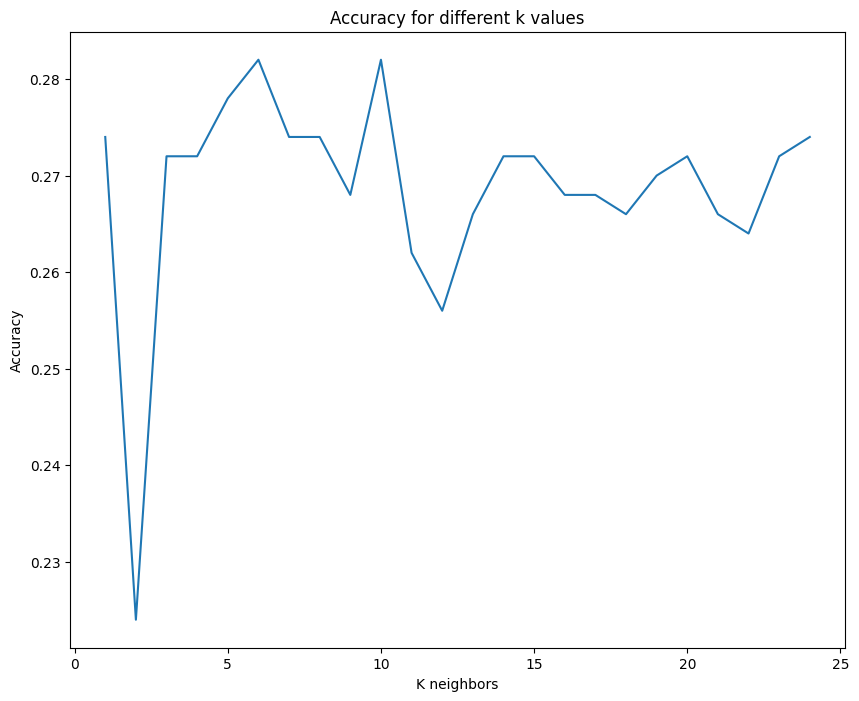

In [12]:
plt.plot(k_accuracies.keys(), k_accuracies.values())
plt.title('Accuracy for different k values')
plt.xlabel("K neighbors")
plt.ylabel("Accuracy")
plt.show()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [13]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

if num_training/num_folds % num_folds != 0.0:
    raise ValueError('Number of training examples not evenly divisible by number of folds.')

X_train_folds = np.split(X_train, num_folds)
y_train_folds = np.split(y_train, num_folds)

k_to_accuracies = {}

for k in k_choices:
    k_to_accuracies[k] = []

for idx in range(num_folds):
    X_train_set = np.concatenate((*X_train_folds[:idx], *X_train_folds[idx+1:]), axis=0)
    y_train_set = np.concatenate((*y_train_folds[:idx], *y_train_folds[idx+1:]), axis=0)
    X_validation_set = X_train_folds[idx]
    y_validation_set = y_train_folds[idx]
    num_validation_set = X_validation_set.shape[0]

    classifier = KNearestNeighbor()
    classifier.train(X_train_set, y_train_set)

    dists_validate = classifier.compute_distances_no_loops(X_validation_set)
    for k in k_choices:
        y_validation_pred = classifier.predict_labels(dists_validate, k=k)
        accuracy = (float(np.sum(np.equal(y_validation_pred, y_validation_set)))/num_validation_set)
        k_to_accuracies[k].append(accuracy)

for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))


k = 1, accuracy = 0.263000
k = 1, accuracy = 0.257000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.278000
k = 1, accuracy = 0.266000
k = 3, accuracy = 0.239000
k = 3, accuracy = 0.249000
k = 3, accuracy = 0.240000
k = 3, accuracy = 0.266000
k = 3, accuracy = 0.254000
k = 5, accuracy = 0.248000
k = 5, accuracy = 0.266000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.292000
k = 5, accuracy = 0.280000
k = 8, accuracy = 0.262000
k = 8, accuracy = 0.282000
k = 8, accuracy = 0.273000
k = 8, accuracy = 0.290000
k = 8, accuracy = 0.273000
k = 10, accuracy = 0.265000
k = 10, accuracy = 0.296000
k = 10, accuracy = 0.276000
k = 10, accuracy = 0.284000
k = 10, accuracy = 0.280000
k = 12, accuracy = 0.260000
k = 12, accuracy = 0.295000
k = 12, accuracy = 0.279000
k = 12, accuracy = 0.283000
k = 12, accuracy = 0.280000
k = 15, accuracy = 0.252000
k = 15, accuracy = 0.289000
k = 15, accuracy = 0.278000
k = 15, accuracy = 0.282000
k = 15, accuracy = 0.274000
k = 20, accuracy = 0.270000
k = 20, accu

k = 1, average accuracy = 0.265600
k = 3, average accuracy = 0.249600
k = 5, average accuracy = 0.273200
k = 8, average accuracy = 0.276000
k = 10, average accuracy = 0.280200
k = 12, average accuracy = 0.279400
k = 15, average accuracy = 0.275000
k = 20, average accuracy = 0.279000
k = 50, average accuracy = 0.274400
k = 100, average accuracy = 0.261600


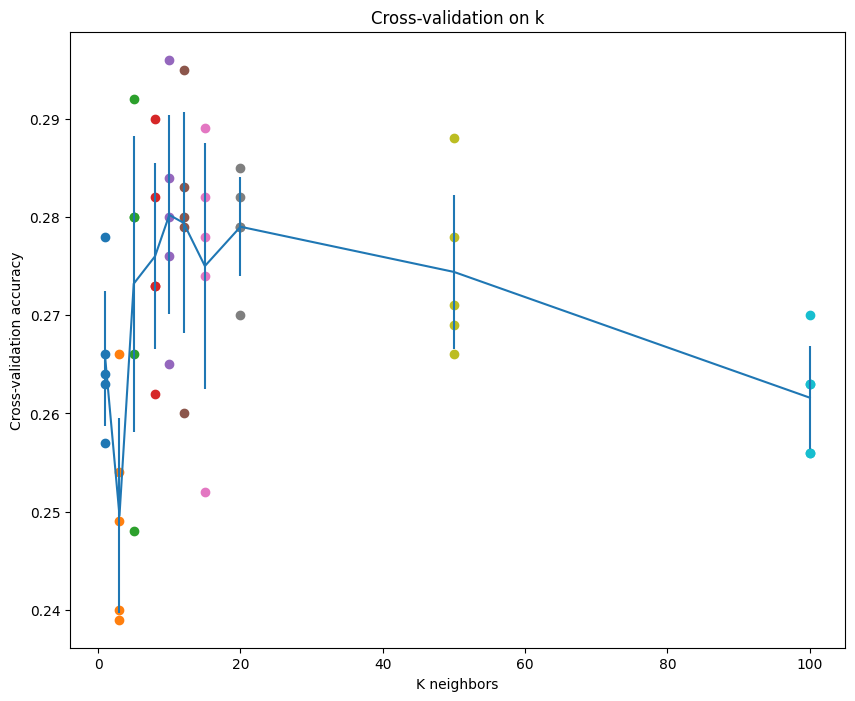

In [14]:
best_k = 0
best_acc = 0

for k in k_choices:
    accuracies = k_to_accuracies[k]
    average_accuracy = np.average(accuracies)
    print('k = %d, average accuracy = %f' % (k, average_accuracy))
    plt.scatter([k] * len(accuracies), accuracies)
    if average_accuracy >= best_acc:
        best_acc = average_accuracy
        best_k = k

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('K neighbors')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [15]:
best_k

10


1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k



In [16]:
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 141 / 500 correct => accuracy: 0.282000


1.11 Сделайте выводы по результатам 1 части задания.

Время, необходимое для классификации с помощью kNN, увеличивается с размером обучающей выборки, поэтому она была сокращена до 5000. Наилучший результат обучения в таком случае был достигнут при k = 10.

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [17]:
num_train = 49000
num_test = 1000
num_val = 1000
num_dev = 500

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

X_val = X_train[num_train:(num_train+num_val)]
y_val = y_train[num_train:(num_train+num_val)]

X_train = X_train[0:num_train]
y_train = y_train[0:num_train]

y_test = y_test[0:num_test]
X_test = X_test[0:num_test]

mask = np.random.choice(num_train, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

print('Train image shape:    {0}'.format(X_train.shape))
print('Train label shape:    {0}'.format(y_train.shape))
print('Validate image shape: {0}'.format(X_val.shape))
print('Validate label shape: {0}'.format(y_val.shape))
print('Test image shape:     {0}'.format(X_test.shape))
print('Test label shape:     {0}'.format(y_test.shape))
print('Dev image shape:      {0}'.format(X_test.shape))
print('Dev label shape:      {0}'.format(y_test.shape))

Train image shape:    (49000, 32, 32, 3)
Train label shape:    (49000,)
Validate image shape: (1000, 32, 32, 3)
Validate label shape: (1000,)
Test image shape:     (1000, 32, 32, 3)
Test label shape:     (1000,)
Dev image shape:      (1000, 32, 32, 3)
Dev label shape:      (1000,)


2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

[[[130.64189796 135.98173469 132.47391837]
  [130.05569388 135.34804082 131.75402041]
  [130.96055102 136.14328571 132.47636735]
  [131.48467347 136.58542857 132.78293878]
  [132.094      137.14008163 133.177     ]
  [132.76759184 137.77767347 133.70602041]
  [133.29373469 138.21244898 134.08095918]
  [133.8194898  138.67242857 134.45065306]
  [134.41440816 139.20602041 134.94291837]
  [134.85138776 139.55787755 135.22173469]
  [135.14859184 139.86202041 135.43195918]
  [135.31191837 140.00128571 135.5654898 ]
  [135.52016327 140.17377551 135.71577551]
  [135.54589796 140.17855102 135.71587755]
  [135.55465306 140.15055102 135.69661224]
  [135.52167347 140.08855102 135.63073469]
  [135.4325102  140.00187755 135.47902041]
  [135.39046939 139.9555102  135.43814286]
  [135.36910204 139.93644898 135.44763265]
  [135.25942857 139.84093878 135.34230612]
  [134.98636735 139.59830612 135.08753061]
  [134.84430612 139.51479592 135.07187755]
  [134.69879592 139.39363265 134.9984898 ]
  [134.4198

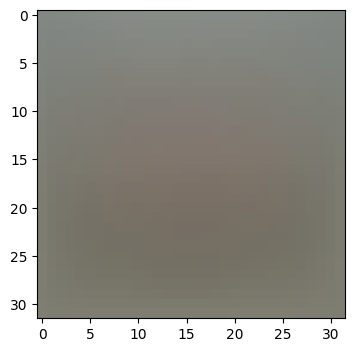

In [18]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10])
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8'))
plt.show()

In [19]:
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [20]:
from scripts.classifiers.linear_svm import svm_loss_naive
import time

W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000001)
print('loss: %f' % (loss, ))

loss: 9.041369



2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [21]:
from scripts.gradient_check import grad_check_sparse

In [22]:
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e2)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e2)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: 5.820422 analytic: 5.820422, relative error: 2.561652e-11
numerical: 16.680711 analytic: 16.680711, relative error: 1.188138e-11
numerical: 12.776761 analytic: 12.776761, relative error: 2.633331e-11
numerical: 26.181142 analytic: 26.181142, relative error: 8.633478e-12
numerical: -8.211902 analytic: -8.211902, relative error: 1.659243e-11
numerical: 4.092776 analytic: 4.092776, relative error: 8.604995e-11
numerical: 11.781675 analytic: 11.781675, relative error: 7.265970e-12
numerical: 0.649171 analytic: 0.649171, relative error: 2.348394e-10
numerical: -15.191378 analytic: -15.191378, relative error: 2.038123e-13
numerical: -10.392775 analytic: -10.392775, relative error: 2.372829e-12
numerical: -5.459938 analytic: -5.459938, relative error: 1.994203e-11
numerical: 29.661955 analytic: 29.661955, relative error: 2.875341e-12
numerical: 19.960085 analytic: 19.960085, relative error: 1.321609e-11
numerical: -44.632761 analytic: -44.632761, relative error: 9.124409e-13
numeri

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [23]:
from scripts.classifiers.linear_svm import svm_loss_vectorized

In [24]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.067421s
Vectorized loss and gradient: computed in 0.002001s
difference: 0.000000


2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [25]:
from scripts.classifiers import LinearSVM

In [26]:
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 400.000803
iteration 100 / 1500: loss 238.061027
iteration 200 / 1500: loss 145.630539
iteration 300 / 1500: loss 90.922085
iteration 400 / 1500: loss 56.536022
iteration 500 / 1500: loss 36.986094
iteration 600 / 1500: loss 24.287572
iteration 700 / 1500: loss 16.804788
iteration 800 / 1500: loss 11.996108
iteration 900 / 1500: loss 9.156662
iteration 1000 / 1500: loss 7.695891
iteration 1100 / 1500: loss 6.703745
iteration 1200 / 1500: loss 5.510327
iteration 1300 / 1500: loss 5.063753
iteration 1400 / 1500: loss 4.895631
That took 2.682642s


In [27]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred),))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred),))

training accuracy: 0.380224
validation accuracy: 0.379000


2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [31]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [1e4, 2e4, 3e4, 4e4, 5e4]

In [32]:
best_val = -1
best_svm = None
best_lr = 0
best_rs = 0

for lr in learning_rates:
    for rs in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(
            X_train, y_train, lr, rs, num_iters=1500, batch_size=200)
        y_train_pred = svm.predict(X_train)
        y_val_pred = svm.predict(X_val)
        training_accuracy = np.mean(y_train == y_train_pred)
        validation_accuracy = np.mean(y_val == y_val_pred)

        if validation_accuracy > best_val:
            best_val = validation_accuracy
            best_svm = svm
            best_lr = lr
            best_rs = rs

print('Best validation accuracy achieved during cross-validation: %f' % best_val)
print('Best learning rate:', best_lr)
print('Best regularization strength:', best_rs)

Best validation accuracy achieved during cross-validation: 0.390000
Best learning rate: 1e-07
Best regularization strength: 20000.0


In [30]:
y_test_pred = best_svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('Accuracy on test set: %f' % test_accuracy)

Accuracy on test set: 0.379000


2.9 Сделайте выводы по второй части задания

Наилучшего качества LinearSVM удалось достичь при learning_rate = 1e-7 и regularization_strength = 2e4.